In [44]:
import numpy as np 
import json,os
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statannot import add_stat_annotation

In [45]:
list_file = os.listdir("../clams/ambreducer_results/")


init_loss = []
final_loss = []
init_amb = []
final_amb = []
for file in list_file:
  if file.endswith("_results.json"):
    with open("../clams/ambreducer_results/"+file) as f:
      data = json.load(f)
      init_loss += [data["init_loss"]]
      final_loss += [data["final_loss"]]
      init_amb += [data["initial_embiguity"]]
      final_amb += [data["final_ambiguity"]]

In [46]:
print(ttest_ind(init_loss, final_loss))

print(ttest_ind(init_amb, final_amb))


Ttest_indResult(statistic=0.4554490534807608, pvalue=0.6504867213731065)
Ttest_indResult(statistic=2.550376645619546, pvalue=0.013423521094578119)


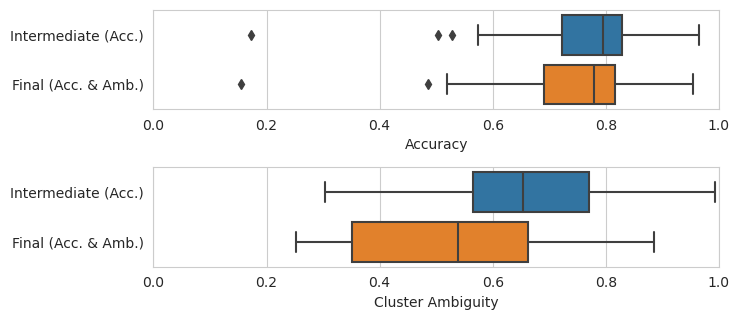

In [47]:
df = pd.DataFrame({
  "Accuracy": init_loss + final_loss,
  "Cluster Ambiguity": init_amb + final_amb,
  "type": ["Intermediate (Acc.)"]*len(init_loss) + ["Final (Acc. & Amb.)"]*len(final_loss)
})

fig, ax = plt.subplots(2, 1, figsize=(7.5,3.3))

sns.set_style("whitegrid")
sns.boxplot(x="Accuracy", y="type", data=df, ax=ax[0])
sns.boxplot(x="Cluster Ambiguity", y="type", data=df, ax=ax[1])


ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1)

ax[0].set_ylabel("")
ax[1].set_ylabel("")





plt.tight_layout()

plt.savefig("./plot/ambreducer.pdf", dpi=300)
plt.savefig("./plot/ambreducer.png", dpi=300)